In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
#data = pd.read_json('../input/Cell_Phones_and_Accessories_5.json', lines=True)
data = pd.read_csv('data/amazon-reviews-sample.csv')

In [3]:
data.shape

(1649, 10)

In [4]:
#Data Exploration
data.columns

Index(['asin', 'helpful', 'overall', 'reviewText', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary', 'unixReviewTime', 'title'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 10 columns):
asin              1649 non-null object
helpful           1649 non-null object
overall           1649 non-null int64
reviewText        1648 non-null object
reviewTime        1649 non-null object
reviewerID        1649 non-null object
reviewerName      1642 non-null object
summary           1649 non-null object
unixReviewTime    1649 non-null int64
title             1649 non-null object
dtypes: int64(2), object(8)
memory usage: 128.9+ KB


In [6]:
data.describe()

,overall,unixReviewTime
count,1649.000000,1.649000e+03
mean,3.844148,1.305118e+09
std,1.361072,7.405321e+07
min,1.000000,1.033690e+09
25%,3.000000,1.251245e+09
50%,4.000000,1.319242e+09
75%,5.000000,1.364947e+09
max,5.000000,1.405296e+09


# Top 10 products

In [7]:
rating = data.groupby('title').describe()['overall'].sort_values('mean', ascending=False)[['mean']]
rating.head(10)

,mean
title,
PowerBear Samsung Galaxy S3 Rechargeable External Battery Case - Black (Go Beyond Your Power),5.000000
ExpertPower EXP612 6V 1.2 Amp Rechargeable Battery,5.000000
Power Support Anti-Glare Film Set for iPhone (Original),4.800000
BlackBerry Lambskin Leather Swivel Holster for 8100 Pearl,4.800000
Jabra SP200 Bluetooth Speakerphone Car Kit [Retail Packaging],4.666667
3 PACK BlackBerry Curve 8900 Screen Protector,4.600000
"BlackBerry Charging Pod for 8100, 8110, 8120, 8130 Pearl (Silver)",4.600000
Motorola Bluetooth H710 Headset [Retail Packaging],4.600000
weBoost 3G Wireless Cellular Phone Signal Booster Kit for Vehicle - Smart Technology Amplifier Kit,4.600000


# Most Popular Products

In [8]:
# find the 10 most frequent product_type_names.
from collections import Counter
product_type_count = Counter(list(data['title']))
product_type_count.most_common(10)

[('OtterBox Impact Case for iPhone 3G/3GS - White', 104),
 ('Plantronics Discovery 925 Bluetooth Earpiece - Black - Retail Packaging (Discontinued by Manufacturer)',
  100),
 ('EMPIRE 5-Pack Premium Reusable LCD Mirror Screen Protector with Lint Cleaning Cloth for Apple iPhone 3G 8GB 16GB / 3G S 16GB 32GB [EMPIRE Packaging]',
  47),
 ('BlackBerry USB DataSync and Charging Cable with Micro USB for BlackBerry 8900, 9500, and 8220',
  46),
 ('Scosche IS IU3.5RCR 3.5mm Retractable Cable', 42),
 ('GNWE PREMIUM SPECIAL Apple Iphone 4gb 8gb 16gb 32gb Perfect Fit Leather Case (All Versions Including 3g)',
  40),
 ('SANOXY High Output Dual USB Port Car Charger for Ipad, Samsung Galaxy, Iphone, Blackberry, Droid, Gps, and Other Tablets, Smart Phones and High Powered Devices',
  37),
 ('Cyberpower CP-H420P USB Hub, 4-Port, USB 2.0, 480Mbps, 1.1/2.0 Compatible, PC/MAC PlugNPlay',
  34),
 ('Otterbox [Defender Series] Samsung Galaxy S5 Case - Frustration-Free Packaging Protective Case for Galaxy S5 

# Recommender Systems

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack

In [10]:
# Sort the whole data based on title (alphabetical order of title) 
data_copy = data.copy()
data_sorted = data.sort_values('title', ascending=False)
data_sorted.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,title
782,B0011GI94Q,"[1, 1]",5,This product is great. Little pricey but well ...,"12 23, 2012",A10369001SFW0R3OV4GSZ,Powerstroke way,Great product,1356220800,weBoost 3G Wireless Cellular Phone Signal Boos...
780,B0011GI94Q,"[1, 1]",5,I use a droid bionic - I've bought into the sy...,"10 2, 2012",A203OCQQ12MAVT,"HMMWV ""God, Country, Corps""","Great kit, ships complete, deals with newer ph...",1349136000,weBoost 3G Wireless Cellular Phone Signal Boos...
779,B0011GI94Q,"[0, 1]",4,The unit works boosting weak cell phone signal...,"07 6, 2011",A2LSL3S8R3P743,GoGator5555,Booster,1309910400,weBoost 3G Wireless Cellular Phone Signal Boos...
783,B0011GI94Q,"[2, 2]",5,I was deep in the upper Mojave Desert. I've b...,"03 12, 2014",A15NFAT4JJBOO,"Tony Stompanado ""Tony Stompanado""",Tested and its perfect,1394582400,weBoost 3G Wireless Cellular Phone Signal Boos...
781,B0011GI94Q,"[1, 2]",4,I have tested this device pretty extensively f...,"10 13, 2011",A2EMM9HWOSY2Q5,Jemmie Wang,Works in certain situations,1318464000,weBoost 3G Wireless Cellular Phone Signal Boos...


In [11]:
data_unique = data_sorted.drop_duplicates(subset='asin', keep="last")
data_unique.shape

(130, 10)

In [12]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

stop_words = set(stopwords.words('english'))
print ('list of stop words:', list(stop_words)[:10])

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.import time
            word = ("".join(e for e in words if e.isalnum()))
            # Conver all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        data_unique[column][index] = string
            

list of stop words: ['are', 'because', 'in', 'when', "should've", "won't", "didn't", 'into', "haven't", "hasn't"]


In [13]:
import time
start_time = time.clock()
# we take each title and we text-preprocess it.
for index, row in data_unique.iterrows():
    nlp_preprocessing(row['title'], index, 'title')
# we print the time it took to preprocess whole titles 
print(time.clock() - start_time, "seconds")

/home/gokul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/gokul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


48.642205 seconds


In [14]:
data_unique.to_csv("output/preprocessed.csv")

In [15]:
data_unique.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,title
781,B0011GI94Q,"[1, 2]",4,I have tested this device pretty extensively f...,"10 13, 2011",A2EMM9HWOSY2Q5,Jemmie Wang,Works in certain situations,1318464000,weboost 3g wireless cellular phone signal boos...
1076,B001BNE5YW,"[0, 0]",4,I have used numerous screen protective films s...,"06 21, 2009",AGGAQLXPVGM5D,Eagle Vision,Great protection,1245542400,invisibleshield apple iphone 3g back
1102,B001C1MD9M,"[0, 2]",1,Doesn't work with an Otterbox Defender case! N...,"12 16, 2009",AMYZ7UL1UPEWF,Phil Geusz,Beware! Doesn't Work with Otterbox,1260921600,iphone 3g stylus
1437,B001KD6ZRS,"[1, 1]",4,I think that this case is pretty cool.It is al...,"03 1, 2011",A3M6L13YZ8IUYJ,Nash,Can't even tell it's on,1298937600,elago s3 case iphone 3g3gs high glossy black ...
1160,B001DTT742,"[0, 0]",5,Wilson Electronics - Sleek - Cell Phone Signal...,"06 12, 2013",A12XH53PZSARTV,old man in Texas,works great,1370995200,wilson gooseneck suction cup mount wilson crad...


In [16]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [17]:
#plotting code to understand the algorithm's decision.
def plot_heatmap(keys, values, labels, text):
        # keys: list of words of recommended title
        # values: len(values) ==  len(keys), values(i) represents the occurence of the word keys(i)
        # labels: len(labels) == len(keys), the values of labels depends on the model we are using
                # if model == 'bag of words': labels(i) = values(i)
                # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
                # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
        # url : apparel's url

        # we will devide the whole figure into two parts
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        
        # 1st, ploting heat map that represents the count of commonly ocurred words in title2
        ax = plt.subplot(gs[0])
        # it displays a cell in white color if the word is intersection(lis of words of title1 and list of words of title2), in black if not
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) # set that axis labels as the words of title
        ax.set_title(text) # apparel title
        
        
        # displays combine figure ( heat map and image together)
        plt.show()
        
def plot_heatmap_image(doc_id, vec1, vec2, text, model):

    # doc_id : index of the title1
    # vec1 : input apparels's vector, it is of a dict type {word:count}
    # vec2 : recommended apparels's vector, it is of a dict type {word:count}
    # url : apparels image url
    # text: title of recomonded apparel (used to keep title of image)
    # model, it can be any of the models, 
        # 1. bag_of_words
        # 2. tfidf
        # 3. idf

    # we find the common words in both titles, because these only words contribute to the distance between two title vec's
    intersection = set(vec1.keys()) & set(vec2.keys()) 

    # we set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i]=0

    # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    #  if ith word in intersection(lis of words of title1 and list of words of title2): values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]
    
    # labels: len(labels) == len(keys), the values of labels depends on the model we are using
        # if model == 'bag of words': labels(i) = values(i)
        # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
        # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))

    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            # idf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # idf_title_features[doc_id, index_of_word_in_corpus] will give the idf value of word in given document (doc_id)
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)

    plot_heatmap(keys, values, labels, text)

        
# this function gets a list of wrods along with the frequency of each 
# word given "text"
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, you can try 'words = text.split()' this will also gives same result
    return Counter(words) # Counter counts the occurence of each word in list, it returns dict type object {word1:count}



def get_result(doc_id, content_a, content_b, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, text2, model)

In [18]:
print(data_unique.shape)
data_unique.head()

(130, 10)


,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,title
781,B0011GI94Q,"[1, 2]",4,I have tested this device pretty extensively f...,"10 13, 2011",A2EMM9HWOSY2Q5,Jemmie Wang,Works in certain situations,1318464000,weboost 3g wireless cellular phone signal boos...
1076,B001BNE5YW,"[0, 0]",4,I have used numerous screen protective films s...,"06 21, 2009",AGGAQLXPVGM5D,Eagle Vision,Great protection,1245542400,invisibleshield apple iphone 3g back
1102,B001C1MD9M,"[0, 2]",1,Doesn't work with an Otterbox Defender case! N...,"12 16, 2009",AMYZ7UL1UPEWF,Phil Geusz,Beware! Doesn't Work with Otterbox,1260921600,iphone 3g stylus
1437,B001KD6ZRS,"[1, 1]",4,I think that this case is pretty cool.It is al...,"03 1, 2011",A3M6L13YZ8IUYJ,Nash,Can't even tell it's on,1298937600,elago s3 case iphone 3g3gs high glossy black ...
1160,B001DTT742,"[0, 0]",5,Wilson Electronics - Sleek - Cell Phone Signal...,"06 12, 2013",A12XH53PZSARTV,old man in Texas,works great,1370995200,wilson gooseneck suction cup mount wilson crad...


In [19]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data_unique['title'])
print(tfidf_title_features[:5])
print(tfidf_title_features.shape)

  (0, 610)	0.3011166542957867
  (0, 22)	0.1543525477938182
  (0, 619)	0.2205623739628727
  (0, 152)	0.2775560376621195
  (0, 426)	0.15672461716274852
  (0, 504)	0.3011166542957867
  (0, 126)	0.2775560376621195
  (0, 339)	0.4957463422560619
  (0, 581)	0.3011166542957867
  (0, 512)	0.2775560376621195
  (0, 552)	0.2775560376621195
  (0, 89)	0.2775560376621195
  (1, 22)	0.3198489688684513
  (1, 323)	0.6239731884068231
  (1, 94)	0.36628677652704095
  (1, 328)	0.28641919587905745
  (1, 107)	0.5405109978868471
  (2, 22)	0.4777764356117406
  (2, 328)	0.427840499164338
  (2, 539)	0.7672562706481781
  (3, 328)	0.1652410438595124
  (3, 233)	0.3599827891292206
  (3, 474)	0.29633058889304253
  (3, 146)	0.19340759117064366
  (3, 23)	0.3118317584624567
  (3, 295)	0.3118317584624567
  (3, 272)	0.33181624181808933
  (3, 115)	0.15544070115920866
  (3, 569)	0.23551418048456169
  (3, 215)	0.3599827891292206
  (3, 82)	0.2729567868514983
  (3, 313)	0.3599827891292206
  (4, 615)	0.6296036126701964
  (4, 275)

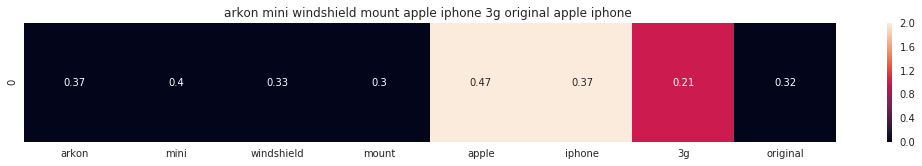

ASIN : B001G2JPVQ
Eucliden distance from the given image : 1.1454620810676603


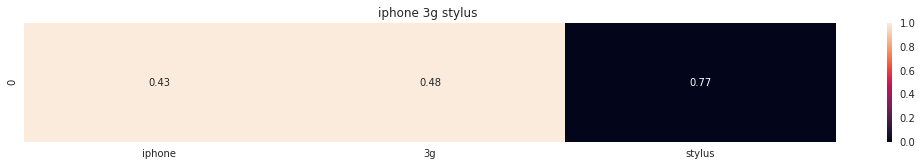

ASIN : B001C1MD9M
Eucliden distance from the given image : 1.2038620917570222


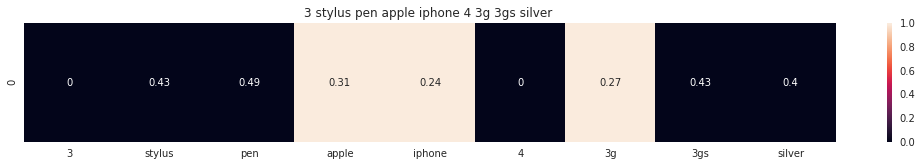

ASIN : B002AUPWA6
Eucliden distance from the given image : 1.20904235790098


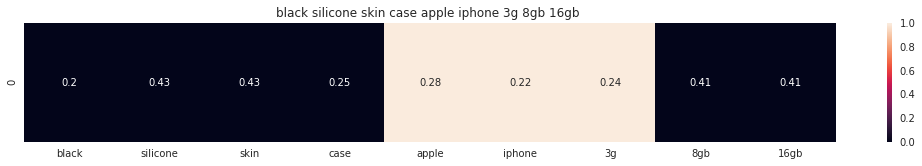

ASIN : B001E6KE46
Eucliden distance from the given image : 1.232225984754131


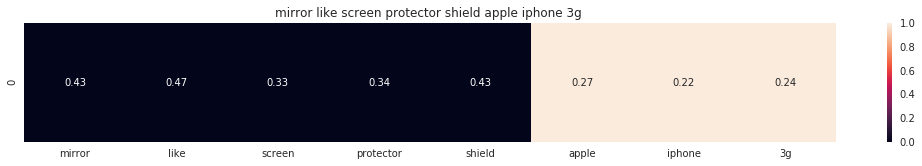

ASIN : B000J4YU3A
Eucliden distance from the given image : 1.2336113052741464


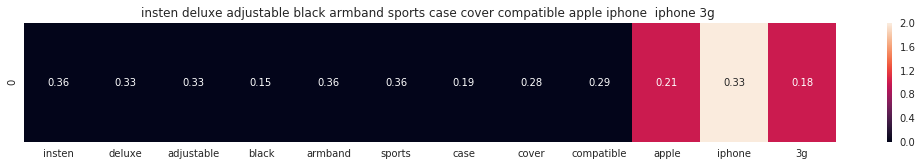

ASIN : B0011WFERU
Eucliden distance from the given image : 1.2425362968855989


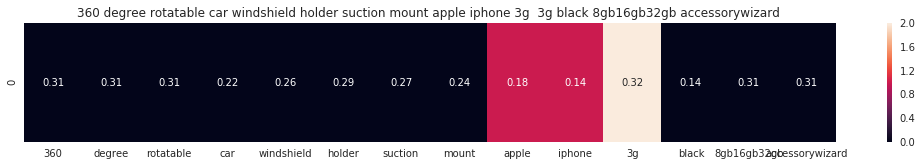

ASIN : B001TI1GLO
Eucliden distance from the given image : 1.2553967840073916


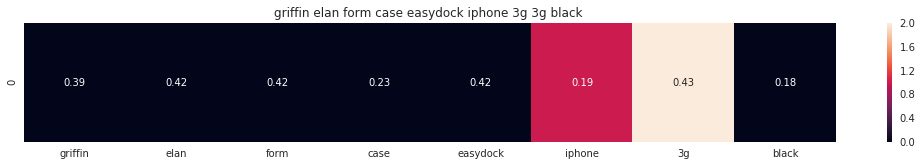

ASIN : B001B4QMI8
Eucliden distance from the given image : 1.269362485806425


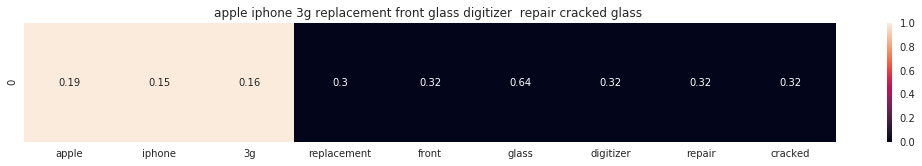

ASIN : B001ISL548
Eucliden distance from the given image : 1.292928217589384


In [20]:
def tfidf_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id])

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results+5]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results+5]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data_unique.index[indices])

    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        if(pdists[i] != 0.0):
            get_result(indices[i], data_unique['title'].loc[df_indices[0]], data_unique['title'].loc[df_indices[i]], 'tfidf')
            print('ASIN :',data_unique['asin'].loc[df_indices[i]])
            print ('Eucliden distance from the given image :', pdists[i])
            print('='*100)
tfidf_model(1, 5)
# in the output heat map each value represents the tfidf values of the label word, the color represents the intersection with inputs title

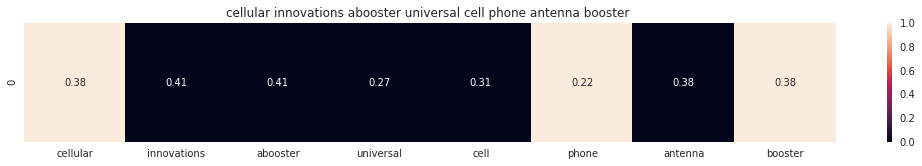

ASIN : B00009WCAP
Eucliden distance from the given image : 1.2281275269852332


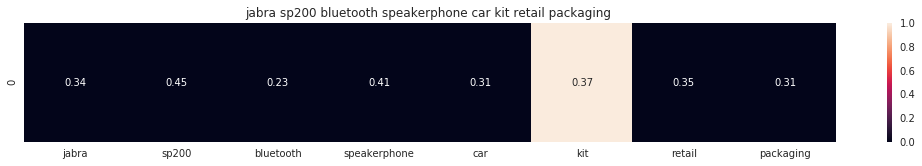

ASIN : B00275G0H8
Eucliden distance from the given image : 1.277872052482436


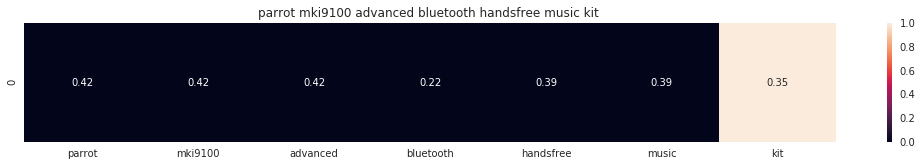

ASIN : B001JL5WA2
Eucliden distance from the given image : 1.2870760120613924


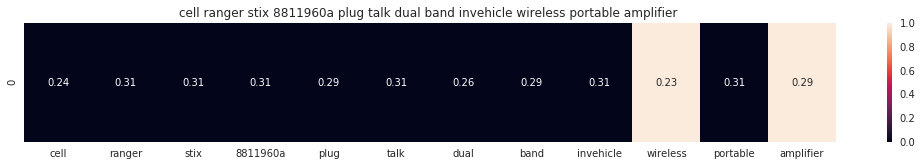

ASIN : B001AY3IJA
Eucliden distance from the given image : 1.3192294844727985


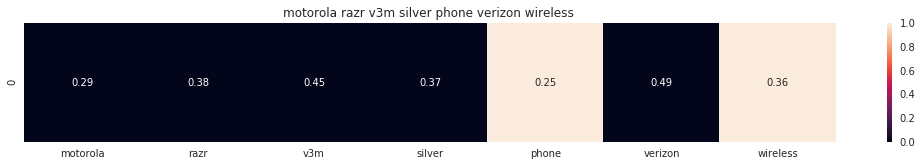

ASIN : B000G7LWRM
Eucliden distance from the given image : 1.3277994771112633


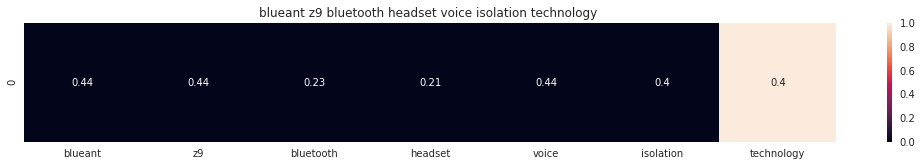

ASIN : B000SAD7RA
Eucliden distance from the given image : 1.3325572853621235


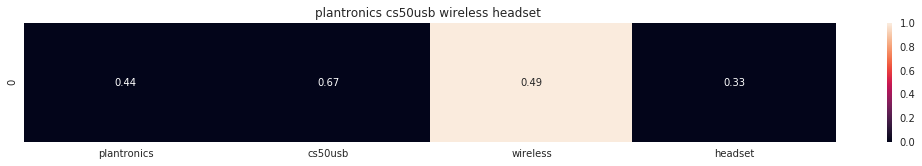

ASIN : B0006DPT5M
Eucliden distance from the given image : 1.3349511679468848


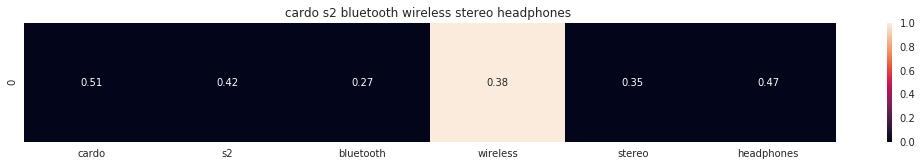

ASIN : B000T1RU3A
Eucliden distance from the given image : 1.3544233125509748


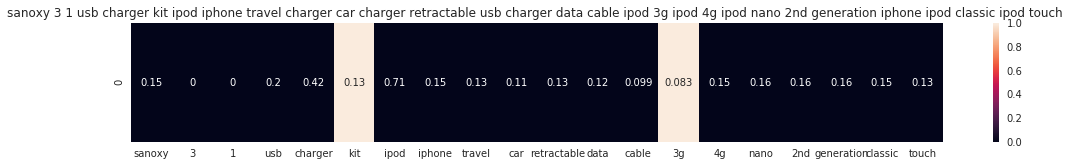

ASIN : B000YCAH8Y
Eucliden distance from the given image : 1.357522477331427


In [21]:
tfidf_model(0,5)

In [22]:
data_unique_copy = data_unique.copy().reset_index()
print(data_unique_copy['title'].head(20))
#ip = input("Enter your choice: ")
#tfidf_model(ip, 5)

0     weboost 3g wireless cellular phone signal boos...
1                 invisibleshield apple iphone 3g back 
2                                     iphone 3g stylus 
3     elago s3 case iphone 3g3gs high glossy  black ...
4     wilson gooseneck suction cup mount wilson crad...
5     wilson electronics 12inch dual band magnetmoun...
6     vxi corporation b150 bluetooth headset charger...
7     neat company 00009 travel case neatco mobile s...
8      ten one design pogo stylus iphone 3g3gs  silver 
9     sony drbt50 stereo bluetooth headset discontin...
10      sennheiser mm 100 bluetooth headset  blackgray 
11    seidio innocase ii surface spring clip holster...
12              scosche iu35rcr 35mm retractable cable 
13    scosche ipav sneakpeak audiovideo cable ipadip...
14    satechi icel 5200 mah 2 amp battery extender p...
15    samsung usb data cable u900 t919 behold t459 g...
16    samsung sgha877 impression 3g gsm cell phone b...
17    samsung official oem travel wall charger g